In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\akank\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
df.tail()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [26]:
!git remote add origin https://github.com/akanksha-upadhyay1/Exploratory-Data-Telecom-Customer-Churn-Analysis.git
!git branch -M main
!git push -u origin main

error: remote origin already exists.


branch 'main' set up to track 'origin/main'.


Everything up-to-date


In [27]:
# To inspect the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
# Replacing blanks with 0 as tenure is 0 and no total charges are recorded
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [30]:
# To find where is null value

df.isnull().sum().sum()

np.int64(0)

In [31]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [32]:
df.duplicated().sum()

np.int64(0)

In [33]:
df["customerID"].duplicated().sum()

np.int64(0)

In [65]:
def conv(value):
    if value == 1:
        return "yes"
    else: 
        return "no"
    
    df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)
   

# converted 0 and 1 values of senior citizen to yes or no to make it easier to understand.

In [66]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [69]:
def conv(value):
    if value == 1:
        return "yes"
    else: 
        return "no"
    
    df['SeniorCitizen'] = df["SeniorCitizen"].astype(int).apply(conv)
   

In [70]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [71]:
print(df.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [72]:
print(df["SeniorCitizen"].unique())
print(df["SeniorCitizen"].dtype)


[0 1]
int64


In [73]:
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1: "Yes", 0: "No"})


In [74]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [75]:
!git add .
!git commit -m "Use info, isnull function and find out if any duplicate value is present further this converted 0 and 1 values of senior citizen to yes or no to make it easier to understand."
!git push origin main

[main 5da605f] Use info, isnull function and find out if any duplicate value is present further this converted 0 and 1 values of senior citizen to yes or no to make it easier to understand.
 1 file changed, 1019 insertions(+), 69 deletions(-)


To https://github.com/akanksha-upadhyay1/Exploratory-Data-Telecom-Customer-Churn-Analysis.git
   6a15668..5da605f  main -> main


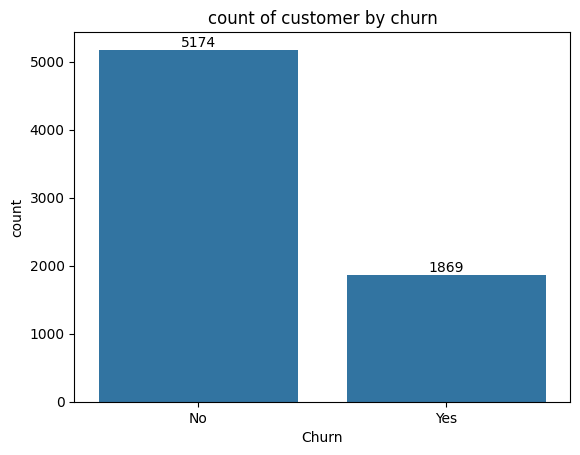

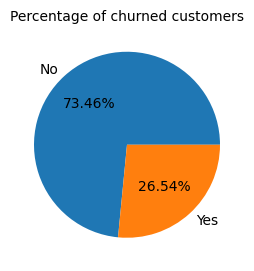

In [7]:
ax = sns.countplot(x='Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("count of customer by churn")
plt.show()

plt.figure(figsize=(3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct="%1.2f%%")
plt.title("Percentage of churned customers", fontsize = 10)
plt.show()

# From the given pie chart we can conclude that 26.54% of our customers have churned out.
# Now let's explore the reason behind it

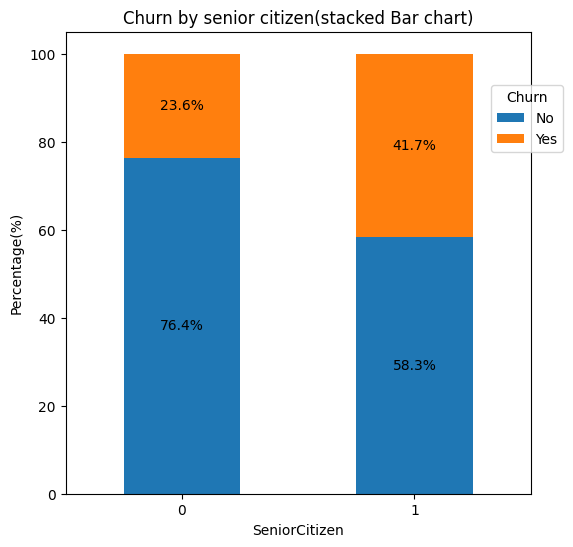

In [13]:
Total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()*100

# Plot
fig, ax = plt.subplots(figsize=(6,6))

#Plot the bar
Total_counts.plot(kind='bar', stacked=True, ax=ax)

#Add percentage labels on the bar
for P in ax.patches:
    width, height = P.get_width(), P.get_height()
    x,y = P.get_xy()
    ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha = 'center', va = 'center')

plt.title('Churn by senior citizen(stacked Bar chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage(%)')
plt.xticks(rotation=0)
plt.legend(title= 'Churn', bbox_to_anchor = (0.9, 0.9) ) # customize legend location
plt.show()

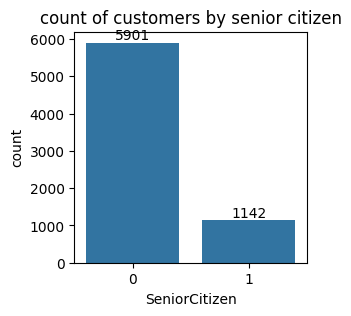

In [12]:
plt.figure(figsize= (3,3))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("count of customers by senior citizen")
plt.show()

# comparative a greater percentage of people in Senior Citizen category has churned out

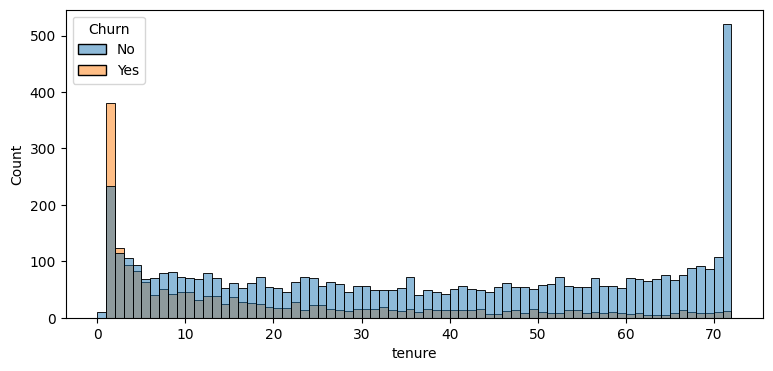

In [16]:
plt.figure(figsize=(9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

# People who have used our services for a long time have stayed and people who have used our service 1 or 2 months have churned 

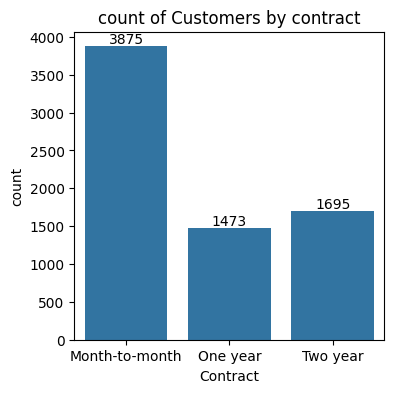

In [18]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = "Contract", data = df)
ax.bar_label(ax.containers[0])
plt.title("count of Customers by contract")
plt.show()

# People who have month to month Contract are likely to churn then from those who have 1 or 2 years of contract.

In [3]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

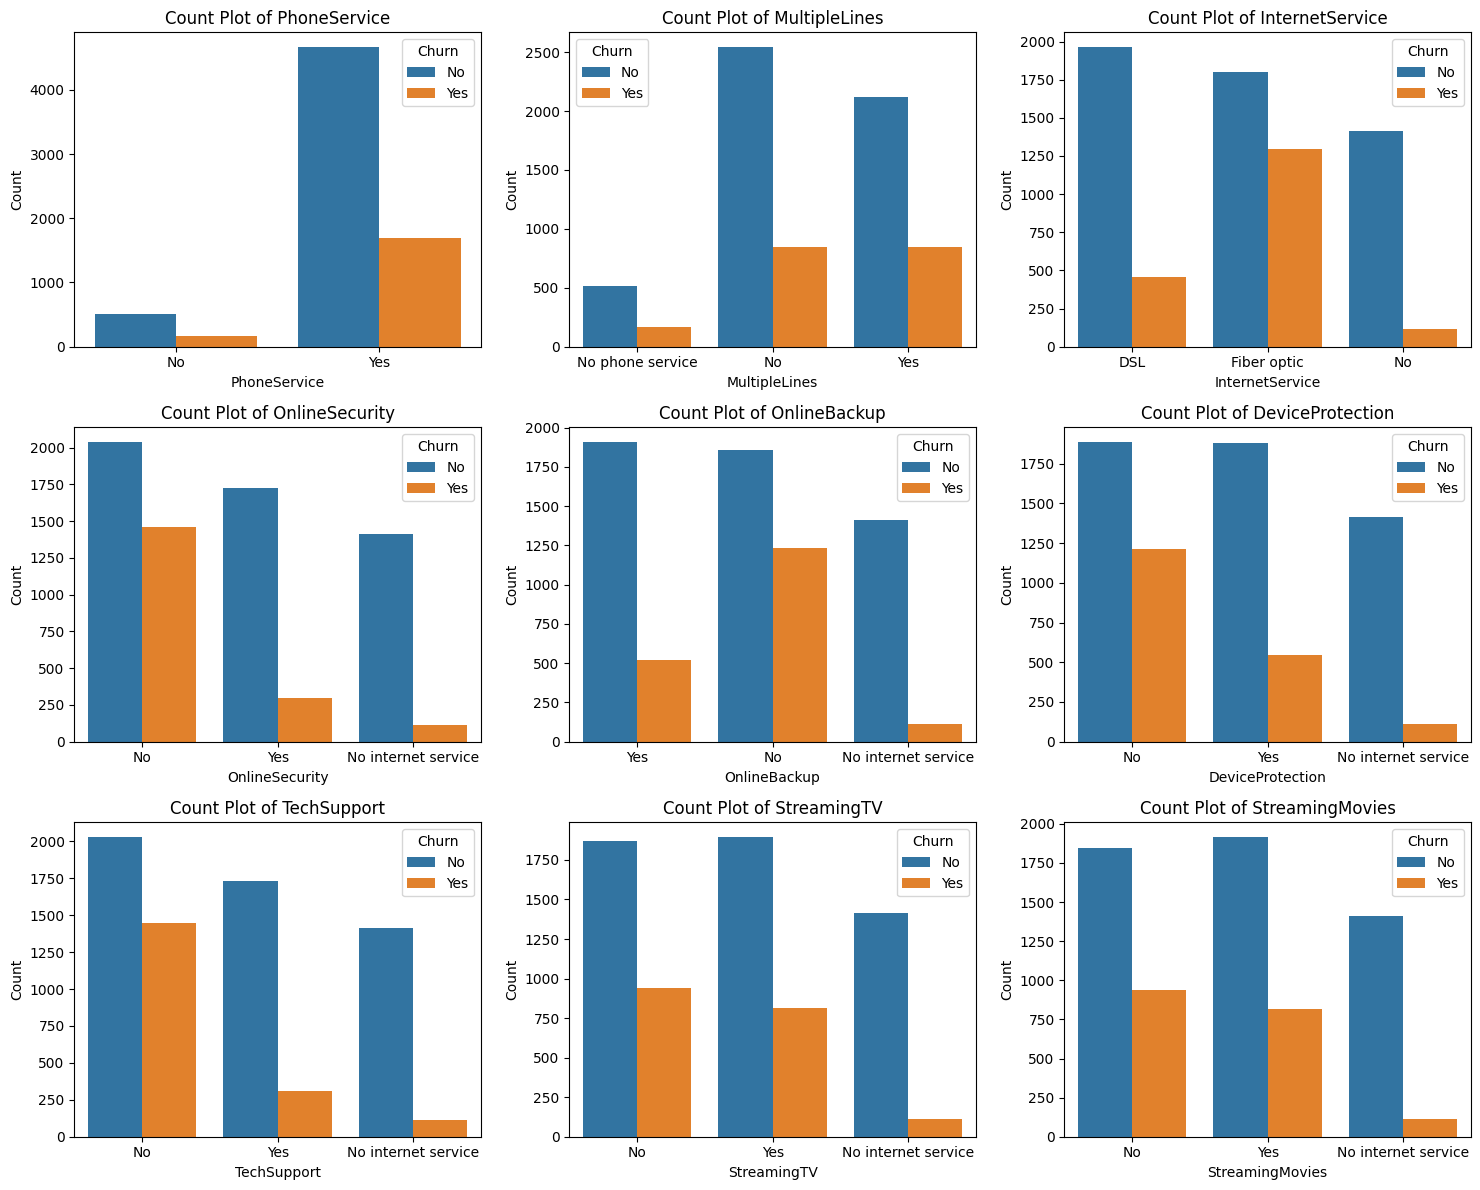

In [22]:
# Columns for which we want countplots
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Number of subplot columns (you can change this)
n_cols = 3

# Automatically calculate number of rows
n_rows = (len(columns) + n_cols - 1) // n_cols

# Create subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Flatten axis array (works for both 1D or 2D)
axes = axes.flatten()

# Loop through each feature and plot
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue="Churn")
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=0)

# If extra empty subplots exist, hide them
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# The majority of Customers who do not churn trend to have services like phoneservices, Internetservice(Particularly DSL) and online security enabled for services like onlineBackUP, Techsupport, and streaming TV, churn rates are noticeably higher when these services are not used or are unavailable

In [2]:
!git add .
!git commit -m "Analyse various data regarding why people are churning and make results."
!git push origin main

[main 9a064cc] Analyse various data regarding why people are churning and make results.
 1 file changed, 332 insertions(+), 4 deletions(-)


To https://github.com/akanksha-upadhyay1/Exploratory-Data-Telecom-Customer-Churn-Analysis.git
   5da605f..9a064cc  main -> main


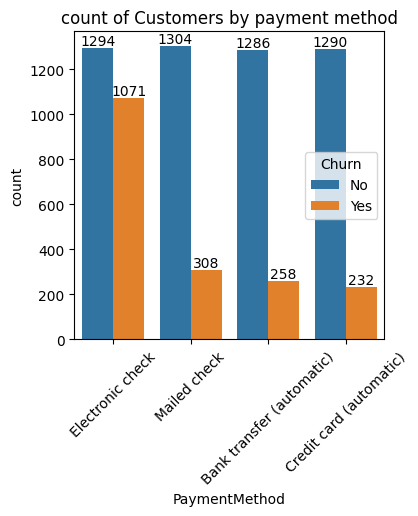

In [4]:
plt.figure(figsize= (4,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("count of Customers by payment method")
plt.xticks(rotation = 45)
plt.show()

# Customer is likely to churn when he is using electronic check as a payment method

In [ ]:
!git add .
!git commit -m "churn analysis for a payment method"
!git push origin main